<a href="https://colab.research.google.com/github/ashishkumar30/Zerodha_Live_Automate_Trading-_using_AI_ML_on_Indian_stock_market-using-basic-python/blob/master/Technical_Indicator's_of_Indian_Stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INDICATORS (ATR,RSI,SMA,EMA,Bollinger band ) on Historical_data 'SBI'

Login to Zerodha and fetching Histrical Data

In [0]:
import time
import secrets 
import threading
import webbrowser
import numpy as np
import pandas as pd 
from math import modf
from pprint import pprint
from pytz import timezone
from datetime import datetime 
import matplotlib.pyplot as plt
%matplotlib inline
from time import gmtime, strftime
from kiteconnect import KiteTicker 
from kiteconnect import KiteConnect
from IPython.display import clear_output

# API KEY and API secter 
api_key='******************* @@enter your api key here@@@**************' 
api_secret='**********************@@enter your api key here****************'  

webbrowser.open_new_tab(KiteConnect(api_key,api_secret).login_url())
kite = KiteConnect(api_key=api_key)
data = kite.generate_session(((str(input("ENTER full link generated in URL :- ")).split("request_token=")[1]).split("&action"))[0],api_secret)
kite.set_access_token(data["access_token"])

#  Getting Historical Data_Download from zerodha for indicator's

In [0]:
'''
    # Date must be present as a Pandas DataFrame with ['date', 'open', 'high', 'low', 'close', 'volume'] as columns
    df = pd.DataFrame(data["data"]["candles"], columns=['date', 'open', 'high', 'low', 'close', 'volume']) 
'''
df=pd.DataFrame(kite.historical_data(779521,"2019-04-14 15:00:00","2019-08-16 09:16:00","day",0))[["date","open","high","low","close","volume"]]
display(df.tail(10))

,date,open,high,low,close,volume
73,2019-08-01 00:00:00+05:30,330.80,331.50,311.35,317.15,40853304
74,2019-08-02 00:00:00+05:30,315.55,322.25,307.05,308.45,64472348
75,2019-08-05 00:00:00+05:30,298.45,302.85,291.70,300.25,48815899
76,2019-08-06 00:00:00+05:30,298.80,304.25,297.25,301.40,30442970
77,2019-08-07 00:00:00+05:30,302.40,302.45,288.80,289.90,30820114
78,2019-08-08 00:00:00+05:30,290.00,295.50,285.60,294.35,32929233
79,2019-08-09 00:00:00+05:30,296.30,298.00,290.05,291.35,23377581
80,2019-08-13 00:00:00+05:30,290.90,291.55,282.50,283.35,24231272
81,2019-08-14 00:00:00+05:30,285.05,291.25,284.50,289.75,18523649
82,2019-08-16 00:00:00+05:30,287.95,292.80,284.30,290.90,20047399


# Ploting data

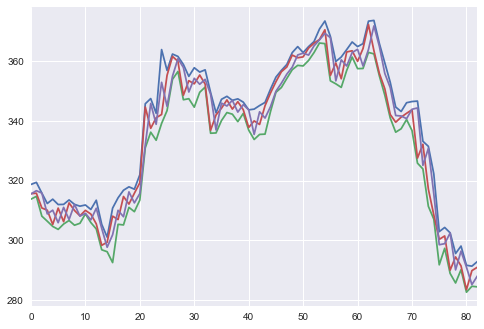

  	'---- ABOVE GRAPH OF OHLC Historical data ----- ' 
 
 


In [0]:
plt.style.use('seaborn')
df['high'].plot()
df['low'].plot()
df['close'].plot()
df['open'].plot()
plt.show()
print ("  \t'---- ABOVE GRAPH OF OHLC Historical data ----- ' \n \n ")

# Indicator's

# 1. ATR (Average True Range)

In [0]:
"""
Function to compute Average True Range (ATR)

Args :
    df : Pandas DataFrame which contains ['date', 'open', 'high', 'low', 'close', 'volume'] columns
    period : Integer indicates the period of computation in terms of number of candles
    ohlc: List defining OHLC Column names (default ['Open', 'High', 'Low', 'Close'])

Returns :
    df : Pandas DataFrame with new columns added for 
        True Range (TR)
        ATR (ATR_$period)
"""

def atr(df,period):
    df['hl']=abs(df['high']-df['low'])
    df['hpc']=abs(df['high']-df['close'].shift())
    df['lpc']=abs(df['low']-df['close'].shift())
    df['tr']=df[['hl','hpc','lpc']].max(axis=1)
    df['ATR']=pd.DataFrame.ewm(df["tr"], span=period,min_periods=period).mean()
    df.drop(["hl","hpc","lpc","tr"],axis = 1 , inplace =True)
atr(df,14)
df.tail()

,date,open,high,low,close,volume,ATR
78,2019-08-08 00:00:00+05:30,290.00,295.50,285.60,294.35,32929233,11.851230
79,2019-08-09 00:00:00+05:30,296.30,298.00,290.05,291.35,23377581,11.331060
80,2019-08-13 00:00:00+05:30,290.90,291.55,282.50,283.35,24231272,11.026916
81,2019-08-14 00:00:00+05:30,285.05,291.25,284.50,289.75,18523649,10.609991
82,2019-08-16 00:00:00+05:30,287.95,292.80,284.30,290.90,20047399,10.328657


# 2. RSI (Relative Strength Index)

In [0]:
"""
    Function to compute Relative Strength Index (RSI)
    
    Args :
        df : Pandas DataFrame which contains ['date', 'open', 'high', 'low', 'close', 'volume'] columns
        period : Integer indicates the period of computation in terms of number of candles
        
    Returns :
        df : Pandas DataFrame with new columns added for 
            Relative Strength Index (RSI_$period)
    """

rsi_period=14
chg=df["close"].diff(1)
gain=chg.mask(chg<0,0) 
loss=chg.mask(chg>0,0)
avg_gain=gain.ewm(com=rsi_period-1,min_periods=rsi_period).mean()
avg_loss=loss.ewm(com=rsi_period-1,min_periods=rsi_period).mean()
rs =abs(avg_gain / avg_loss)
rsi =100 -(100/(1+rs))
df['rsi']=rsi
display(df.tail())

,date,open,high,low,close,volume,ATR,rsi
78,2019-08-08 00:00:00+05:30,290.00,295.50,285.60,294.35,32929233,11.851230,26.529639
79,2019-08-09 00:00:00+05:30,296.30,298.00,290.05,291.35,23377581,11.331060,25.567214
80,2019-08-13 00:00:00+05:30,290.90,291.55,282.50,283.35,24231272,11.026916,23.154909
81,2019-08-14 00:00:00+05:30,285.05,291.25,284.50,289.75,18523649,10.609991,28.931857
82,2019-08-16 00:00:00+05:30,287.95,292.80,284.30,290.90,20047399,10.328657,29.950888


# 3. SMA (simple moving average)

In [0]:
"""
    Function to compute Simple Moving Average (SMA)
    
    Args :
        df : Pandas DataFrame which contains ['date', 'open', 'high', 'low', 'close', 'volume'] columns
        base : String indicating the column name from which the SMA needs to be computed from
        target : String indicates the column name to which the computed data needs to be stored
        period : Integer indicates the period of computation in terms of number of candles
        
    Returns :
        df : Pandas DataFrame with new column added with name 'target'
    """

def SMA(df, column="close", period=14):
    smavg = df.close.rolling(14).mean()
    return df.join(smavg.to_frame('SMA'))
a=SMA(df)
a.tail()

,date,open,high,low,close,volume,ATR,rsi,SMA
78,2019-08-08 00:00:00+05:30,290.00,295.50,285.60,294.35,32929233,11.851230,26.529639,323.685714
79,2019-08-09 00:00:00+05:30,296.30,298.00,290.05,291.35,23377581,11.331060,25.567214,319.435714
80,2019-08-13 00:00:00+05:30,290.90,291.55,282.50,283.35,24231272,11.026916,23.154909,315.232143
81,2019-08-14 00:00:00+05:30,285.05,291.25,284.50,289.75,18523649,10.609991,28.931857,311.671429
82,2019-08-16 00:00:00+05:30,287.95,292.80,284.30,290.90,20047399,10.328657,29.950888,308.071429


# 4. EMA ( Exponential Moving Average)

In [0]:
"""
    Function to compute Exponential Moving Average (EMA)
    Args :
        df : Pandas DataFrame which contains ['date', 'open', 'high', 'low', 'close', 'volume'] columns
        base : String indicating the column name from which the EMA needs to be computed from
        target : String indicates the column name to which the computed data needs to be stored
        period : Integer indicates the period of computation in terms of number of candles
        alpha : Boolean if True indicates to use the formula for computing EMA using alpha (default is False)
    Returns :
        df : Pandas DataFrame with new column added with name 'target'
    """
def EMA(df, column="close", period=14):
    ema = df[column].ewm(span=period, min_periods=period - 1).mean()
    return df.join(ema.to_frame('EMA'))
pp= ( EMA(df)["EMA"].shift(1)*13 + df['close'] ) /  14
pp.tail()

78    321.111774
79    317.329208
80    313.293848
81    309.758441
82    307.172770
dtype: float64

# 5. Bollinger band

In [0]:
def BollingerBand(df, column="close", period=20):
    sma = df[column].rolling(window=period, min_periods=period - 1).mean()
    std = df[column].rolling(window=period, min_periods=period - 1).std()
    up = (sma + (std * 2)).to_frame('BBANDUP')
    lower = (sma - (std * 2)).to_frame('BBANDLO')
    return df.join(up).join(lower)
c=BollingerBand(df)
c.tail()

,date,open,high,low,close,volume,ATR,rsi,BBANDUP,BBANDLO
78,2019-08-08 00:00:00+05:30,290.00,295.50,285.60,294.35,32929233,11.851230,26.529639,387.024069,284.140931
79,2019-08-09 00:00:00+05:30,296.30,298.00,290.05,291.35,23377581,11.331060,25.567214,385.242185,278.697815
80,2019-08-13 00:00:00+05:30,290.90,291.55,282.50,283.35,24231272,11.026916,23.154909,383.881457,272.388543
81,2019-08-14 00:00:00+05:30,285.05,291.25,284.50,289.75,18523649,10.609991,28.931857,379.931275,268.878725
82,2019-08-16 00:00:00+05:30,287.95,292.80,284.30,290.90,20047399,10.328657,29.950888,372.909758,267.750242


* * * * * 

# Other indicator's hint  (HA,MACD, STDDEV, SuperTrend, Ichimoku)

# 6. HA

In [0]:

def HA(df, ohlc=['Open', 'High', 'Low', 'Close']):
    """
    Function to compute Heiken Ashi Candles (HA)
    Args :
        df : Pandas DataFrame which contains ['date', 'open', 'high', 'low', 'close', 'volume'] columns
        ohlc: List defining OHLC Column names (default ['Open', 'High', 'Low', 'Close'])
    Returns :
        df : Pandas DataFrame with new columns added for 
            Heiken Ashi Close (HA_$ohlc[3])
            Heiken Ashi Open (HA_$ohlc[0])
            Heiken Ashi High (HA_$ohlc[1])
            Heiken Ashi Low (HA_$ohlc[2])
    """
    ha_open = 'HA_' + ohlc[0]
    ha_high = 'HA_' + ohlc[1]
    ha_low = 'HA_' + ohlc[2]
    ha_close = 'HA_' + ohlc[3]
    df[ha_close] = (df[ohlc[0]] + df[ohlc[1]] + df[ohlc[2]] + df[ohlc[3]]) / 4
    df[ha_open] = 0.00
    for i in range(0, len(df)):
        if i == 0:
            df[ha_open].iat[i] = (df[ohlc[0]].iat[i] + df[ohlc[3]].iat[i]) / 2
        else:
            df[ha_open].iat[i] = (df[ha_open].iat[i - 1] + df[ha_close].iat[i - 1]) / 2
    df[ha_high]=df[[ha_open, ha_close, ohlc[1]]].max(axis=1)
    df[ha_low]=df[[ha_open, ha_close, ohlc[2]]].min(axis=1)
    return df

# 7. STDDEV

In [0]:
def STDDEV(df, base, target, period):
    """
    Function to compute Standard Deviation (STDDEV)
    Args :
        df : Pandas DataFrame which contains ['date', 'open', 'high', 'low', 'close', 'volume'] columns
        base : String indicating the column name from which the SMA needs to be computed from
        target : String indicates the column name to which the computed data needs to be stored
        period : Integer indicates the period of computation in terms of number of candles
    Returns :
        df : Pandas DataFrame with new column added with name 'target'
    """
    df[target] = df[base].rolling(window=period).std()
    df[target].fillna(0, inplace=True)
    return df

# 8. SuperTrend

In [0]:
def SuperTrend(df, period, multiplier, ohlc=['Open', 'High', 'Low', 'Close']):
    """
    Function to compute SuperTrend
    Args :
        df : Pandas DataFrame which contains ['date', 'open', 'high', 'low', 'close', 'volume'] columns
        period : Integer indicates the period of computation in terms of number of candles
        multiplier : Integer indicates value to multiply the ATR
        ohlc: List defining OHLC Column names (default ['Open', 'High', 'Low', 'Close'])
    Returns :
        df : Pandas DataFrame with new columns added for 
            True Range (TR), ATR (ATR_$period)
            SuperTrend (ST_$period_$multiplier)
            SuperTrend Direction (STX_$period_$multiplier)
    """
    ATR(df, period, ohlc=ohlc)
    atr = 'ATR_' + str(period)
    st = 'ST_' + str(period) + '_' + str(multiplier)
    stx = 'STX_' + str(period) + '_' + str(multiplier)
    """
    SuperTrend Algorithm :
        BASIC UPPERBAND = (HIGH + LOW) / 2 + Multiplier * ATR
        BASIC LOWERBAND = (HIGH + LOW) / 2 - Multiplier * ATR
        FINAL UPPERBAND = IF( (Current BASICUPPERBAND < Previous FINAL UPPERBAND) or (Previous Close > Previous FINAL UPPERBAND))
                            THEN (Current BASIC UPPERBAND) ELSE Previous FINALUPPERBAND)
        FINAL LOWERBAND = IF( (Current BASIC LOWERBAND > Previous FINAL LOWERBAND) or (Previous Close < Previous FINAL LOWERBAND)) 
                            THEN (Current BASIC LOWERBAND) ELSE Previous FINAL LOWERBAND)
        SUPERTREND = IF((Previous SUPERTREND = Previous FINAL UPPERBAND) and (Current Close <= Current FINAL UPPERBAND)) THEN
                        Current FINAL UPPERBAND
                    ELSE
                        IF((Previous SUPERTREND = Previous FINAL UPPERBAND) and (Current Close > Current FINAL UPPERBAND)) THEN
                            Current FINAL LOWERBAND
                        ELSE
                            IF((Previous SUPERTREND = Previous FINAL LOWERBAND) and (Current Close >= Current FINAL LOWERBAND)) THEN
                                Current FINAL LOWERBAND
                            ELSE
                                IF((Previous SUPERTREND = Previous FINAL LOWERBAND) and (Current Close < Current FINAL LOWERBAND)) THEN
                                    Current FINAL UPPERBAND
    """
    # Compute basic upper and lower bands
    df['basic_ub'] = (df[ohlc[1]] + df[ohlc[2]]) / 2 + multiplier * df[atr]
    df['basic_lb'] = (df[ohlc[1]] + df[ohlc[2]]) / 2 - multiplier * df[atr]
    # Compute final upper and lower bands
    df['final_ub'] = 0.00
    df['final_lb'] = 0.00
    for i in range(period, len(df)):
        df['final_ub'].iat[i] = df['basic_ub'].iat[i] if df['basic_ub'].iat[i] < df['final_ub'].iat[i - 1] or df[ohlc[3]].iat[i - 1] > df['final_ub'].iat[i - 1] else df['final_ub'].iat[i - 1]
        df['final_lb'].iat[i] = df['basic_lb'].iat[i] if df['basic_lb'].iat[i] > df['final_lb'].iat[i - 1] or df[ohlc[3]].iat[i - 1] < df['final_lb'].iat[i - 1] else df['final_lb'].iat[i - 1]
    # Set the Supertrend value
    df[st] = 0.00
    for i in range(period, len(df)):
        df[st].iat[i] = df['final_ub'].iat[i] if df[st].iat[i - 1] == df['final_ub'].iat[i - 1] and df[ohlc[3]].iat[i] <= df['final_ub'].iat[i] else \
                        df['final_lb'].iat[i] if df[st].iat[i - 1] == df['final_ub'].iat[i - 1] and df[ohlc[3]].iat[i] >  df['final_ub'].iat[i] else \
                        df['final_lb'].iat[i] if df[st].iat[i - 1] == df['final_lb'].iat[i - 1] and df[ohlc[3]].iat[i] >= df['final_lb'].iat[i] else \
                        df['final_ub'].iat[i] if df[st].iat[i - 1] == df['final_lb'].iat[i - 1] and df[ohlc[3]].iat[i] <  df['final_lb'].iat[i] else 0.00     
    # Mark the trend direction up/down
    df[stx] = np.where((df[st] > 0.00), np.where((df[ohlc[3]] < df[st]), 'down',  'up'), np.NaN)
    # Remove basic and final bands from the columns
    df.drop(['basic_ub', 'basic_lb', 'final_ub', 'final_lb'], inplace=True, axis=1)
    df.fillna(0, inplace=True)
    return df

# 9. MACD

In [0]:
def MACD(df, fastEMA=12, slowEMA=26, signal=9, base='Close'):
    """
    Function to compute Moving Average Convergence Divergence (MACD)
    Args :
        df : Pandas DataFrame which contains ['date', 'open', 'high', 'low', 'close', 'volume'] columns
        fastEMA : Integer indicates faster EMA
        slowEMA : Integer indicates slower EMA
        signal : Integer indicates the signal generator for MACD
        base : String indicating the column name from which the MACD needs to be computed from (Default Close)
    Returns :
        df : Pandas DataFrame with new columns added for 
            Fast EMA (ema_$fastEMA)
            Slow EMA (ema_$slowEMA)
            MACD (macd_$fastEMA_$slowEMA_$signal)
            MACD Signal (signal_$fastEMA_$slowEMA_$signal)
            MACD Histogram (MACD (hist_$fastEMA_$slowEMA_$signal)) 
    """
    fE = "ema_" + str(fastEMA)
    sE = "ema_" + str(slowEMA)
    macd = "macd_" + str(fastEMA) + "_" + str(slowEMA) + "_" + str(signal)
    sig = "signal_" + str(fastEMA) + "_" + str(slowEMA) + "_" + str(signal)
    hist = "hist_" + str(fastEMA) + "_" + str(slowEMA) + "_" + str(signal)
    # Compute fast and slow EMA    
    EMA(df, base, fE, fastEMA)
    EMA(df, base, sE, slowEMA)
    # Compute MACD
    df[macd] = np.where(np.logical_and(np.logical_not(df[fE] == 0), np.logical_not(df[sE] == 0)), df[fE] - df[sE], 0)
    # Compute MACD Signal
    EMA(df, macd, sig, signal)
    # Compute MACD Histogram
    df[hist] = np.where(np.logical_and(np.logical_not(df[macd] == 0), np.logical_not(df[sig] == 0)), df[macd] - df[sig], 0)
    return df

# 10. BBand

In [0]:
def BBand(df, base='Close', period=20, multiplier=2):
    """
    Function to compute Bollinger Band (BBand)
    Args :
        df : Pandas DataFrame which contains ['date', 'open', 'high', 'low', 'close', 'volume'] columns
        base : String indicating the column name from which the MACD needs to be computed from (Default Close)
        period : Integer indicates the period of computation in terms of number of candles
        multiplier : Integer indicates value to multiply the SD
    Returns :
        df : Pandas DataFrame with new columns added for 
            Upper Band (UpperBB_$period_$multiplier)
            Lower Band (LowerBB_$period_$multiplier)
    """
    upper = 'UpperBB_' + str(period) + '_' + str(multiplier)
    lower = 'LowerBB_' + str(period) + '_' + str(multiplier)
    sma = df[base].rolling(window=period, min_periods=period - 1).mean()
    sd = df[base].rolling(window=period).std()
    df[upper] = sma + (multiplier * sd)
    df[lower] = sma - (multiplier * sd)
    df[upper].fillna(0, inplace=True)
    df[lower].fillna(0, inplace=True)
    return df

# 11. Ichimoku

In [0]:
def Ichimoku(df, ohlc=['Open', 'High', 'Low', 'Close'], param=[9, 26, 52, 26]):
    """
    Function to compute Ichimoku Cloud parameter (Ichimoku)    
    Args :
        df : Pandas DataFrame which contains ['date', 'open', 'high', 'low', 'close', 'volume'] columns
        ohlc: List defining OHLC Column names (default ['Open', 'High', 'Low', 'Close'])
        param: Periods to be used in computation (default [tenkan_sen_period, kijun_sen_period, senkou_span_period, chikou_span_period] = [9, 26, 52, 26])
    Returns :
        df : Pandas DataFrame with new columns added for ['Tenkan Sen', 'Kijun Sen', 'Senkou Span A', 'Senkou Span B', 'Chikou Span']
    """
    high = df[ohlc[1]]
    low = df[ohlc[2]]
    close = df[ohlc[3]]
    tenkan_sen_period = param[0]
    kijun_sen_period = param[1]
    senkou_span_period = param[2]
    chikou_span_period = param[3]
    tenkan_sen_column = 'Tenkan Sen'
    kijun_sen_column = 'Kijun Sen'
    senkou_span_a_column = 'Senkou Span A'
    senkou_span_b_column = 'Senkou Span B'
    chikou_span_column = 'Chikou Span'
    # Tenkan-sen (Conversion Line)
    tenkan_sen_high = high.rolling(window=tenkan_sen_period).max()
    tenkan_sen_low = low.rolling(window=tenkan_sen_period).min()
    df[tenkan_sen_column] = (tenkan_sen_high + tenkan_sen_low) / 2
    # Kijun-sen (Base Line)
    kijun_sen_high = high.rolling(window=kijun_sen_period).max()
    kijun_sen_low = low.rolling(window=kijun_sen_period).min()
    df[kijun_sen_column] = (kijun_sen_high + kijun_sen_low) / 2
    # Senkou Span A (Leading Span A)
    df[senkou_span_a_column] = ((df[tenkan_sen_column] + df[kijun_sen_column]) / 2).shift(kijun_sen_period)
    # Senkou Span B (Leading Span B)
    senkou_span_high = high.rolling(window=senkou_span_period).max()
    senkou_span_low = low.rolling(window=senkou_span_period).min()
    df[senkou_span_b_column] = ((senkou_span_high + senkou_span_low) / 2).shift(kijun_sen_period)
    # The most current closing price plotted chikou_span_period time periods behind
    df[chikou_span_column] = close.shift(-1 * chikou_span_period)
    return df